# Joint Embedding of ChEMBL and Indole Datasets

## Importing Libraries

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import embeddingMethods.embedding_3d as e3
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdEHTTools
from rdkit.Chem import PeriodicTable as PeriodicTable

import pickle


import h5py
from scipy.spatial import ConvexHull
from tqdm import tqdm as tq


import importlib
import matplotlib.pyplot as plt
import random
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
!pwd

/home/jovyan/data/april_2024_data/drug_discovery_data/active_programs_database/programs


## Importing Datasets

In [3]:
Indole_dataset = e3.dataset(inp_table = r'../active_database/Database_v4_3.xlsx')
ChEMBL_dataset = e3.dataset(inp_table = '../ChEMBL_dataset/ChEMBL_cleaned_040425.csv')

Experimental Values


89it [00:00, 4258.32it/s]


Litrature Indole (Benz) Values


142it [00:00, 2921.21it/s]


Litrature Quinilones


14it [00:00, 2306.19it/s]


None


66455it [00:23, 2793.12it/s]


## Charachterizing Datasets

In [10]:
ChEMBL_molwts = [Chem.Descriptors.ExactMolWt(i.rdkit_mol) for i in ChEMBL_dataset.compounds]
Indole_molwts = [Chem.Descriptors.ExactMolWt(i.rdkit_mol) for i in Indole_dataset.compounds]

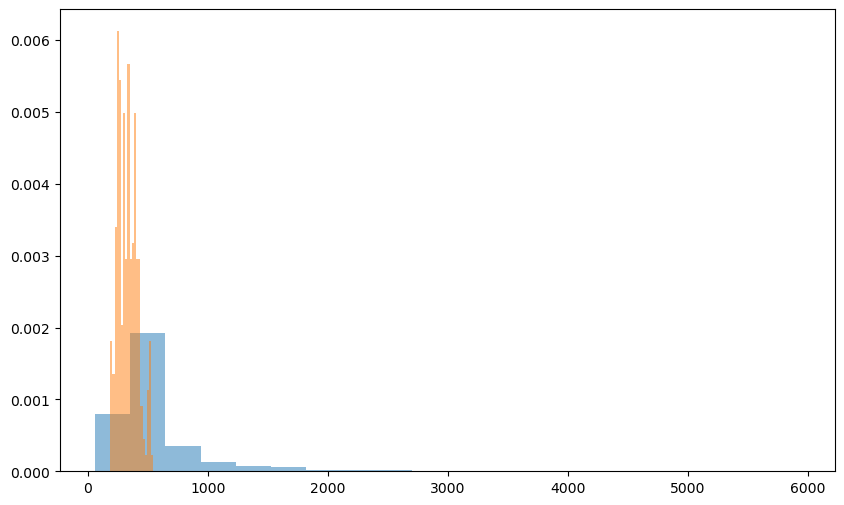

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Plot both histograms with density=True
# density=True normalizes counts so the area of each histogram equals 1.
# alpha makes them translucent so overlaps are visible.
# label for the legend
ax.hist(ChEMBL_molwts, bins=20, density=True, alpha=0.5, label='ChEMBL')
ax.hist(Indole_molwts, bins=20, density=True, alpha=0.5, label='Indole')

plt.show()

In [18]:
np.max(Indole_molwts)

546.0625496400005

In [4]:
ChEMBL_dataset_filtered = ChEMBL_dataset
ChEMBL_dataset_filtered.compounds = [i for i in ChEMBL_dataset.compounds if Chem.Descriptors.ExactMolWt(i.rdkit_mol) <= 550]

In [21]:
ChEMBL_molwts_filtered = [Chem.Descriptors.ExactMolWt(i.rdkit_mol) for i in ChEMBL_dataset_filtered.compounds]
print(len(ChEMBL_molwts_filtered))

47337


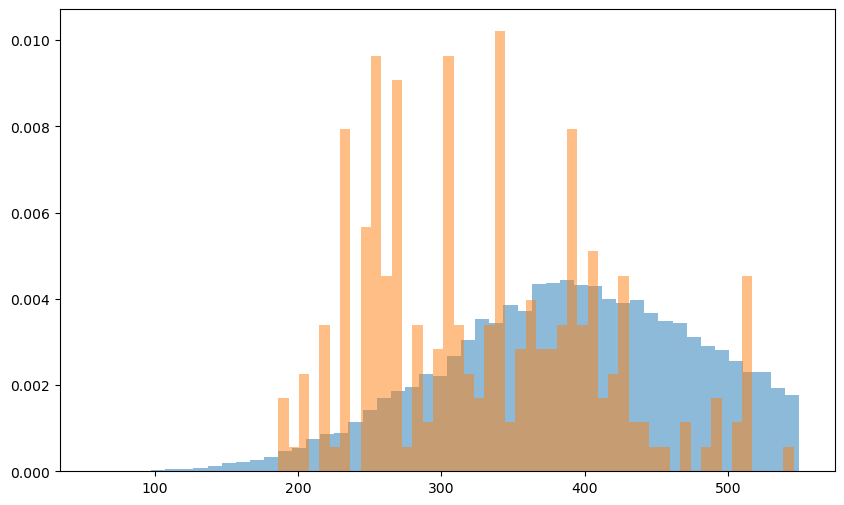

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Plot both histograms with density=True
# density=True normalizes counts so the area of each histogram equals 1.
# alpha makes them translucent so overlaps are visible.
# label for the legend
ax.hist(ChEMBL_molwts_filtered, bins=50, density=True, alpha=0.5, label='ChEMBL')
ax.hist(Indole_molwts, bins=50, density=True, alpha=0.5, label='Indole')

plt.show()

In [ ]:
ChEMBL_dataset.compounds[0].rdkit_mol

## Merging Datasets

In [5]:
Merged_dataset = e3.merge_dataset(ChEMBL_dataset_filtered,
                                  Indole_dataset,
                                  dataset_id_list = ['ChEMBL_dataset_fil', 'Indole_dataset'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 2969955.14it/s]


## Generating Conformers

In [ ]:
Merged_dataset.generate_embedded_conformers(confs = 1)

282it [00:20, 19.76it/s][22:14:47] UFFTYPER: Unrecognized charge state for atom: 4
349it [00:26, 15.09it/s][22:14:53] UFFTYPER: Unrecognized charge state for atom: 3
351it [00:26, 15.57it/s][22:14:53] UFFTYPER: Unrecognized charge state for atom: 2
369it [00:27, 12.14it/s][22:14:54] UFFTYPER: Unrecognized charge state for atom: 4
[22:14:54] UFFTYPER: Unrecognized charge state for atom: 3
655it [00:50, 12.77it/s][22:15:17] UFFTYPER: Unrecognized charge state for atom: 14
657it [00:51, 12.02it/s][22:15:17] UFFTYPER: Unrecognized charge state for atom: 8
993it [01:15, 11.53it/s]

In [7]:
len(Merged_dataset.compounds)

47488

## Embedding Random Subset

In [23]:
rsubset_Merged_dataset = deepcopy(Merged_dataset)
rsubset_Merged_dataset.compounds = random.sample(rsubset_Merged_dataset.compounds, 10000)

In [ ]:
rsubset_Merged_dataset.generate_voxel_embedding(                         
                         batch_size=10,
                         out_dir = r'../DataSetOutputs/ChEMBL_indole_embeddings_112225/ChEMBL_indole_10000_112425.h5',
                         H_atom_diameter = 1,
                         min_max_norm = True,
                         check_shape = True,
                         return_channels=True,
                         verbose = True)

'''
Note that batching, batches embeddings by molecule not conformer
'''

Calculating Scaling Factor. . .


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4290.78it/s]


Scaling factor: 32.42298268631187
Dimension size: 53
Largest mol index: 3367


211it [01:34,  2.01it/s]

Unable to embed conformer molecule number: 2110. May be due to error in convex hull formation coordinates. Skipping Embedding.


449it [03:36,  1.94it/s]/home/jovyan/data/april_2024_data/drug_discovery_data/active_programs_database/programs/embeddingMethods/embedding_3d.py:333: RuntimeWarning: invalid value encountered in multiply
  matrix[i] += np.array([x, y, z])
620it [05:11,  3.33s/it]

## Exporting Activities

In [22]:
out_df = rsubset_Merged_dataset.generate_out_df()
print(out_df.shape)
out_df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 7801.06it/s]

(9989, 5)


,Molecule ID,Conformer ID,GP Activity,GN Activity,Dataset Source
0,0,0,1.0,NaN,ChEMBL_dataset_fil
1,1,0,0.0,0.0,ChEMBL_dataset_fil
2,2,0,0.0,NaN,ChEMBL_dataset_fil
3,3,0,1.0,1.0,ChEMBL_dataset_fil
4,4,0,1.0,NaN,ChEMBL_dataset_fil
...,...,...,...,...,...
9985,9995,0,1.0,1.0,ChEMBL_dataset_fil
9986,9996,0,1.0,1.0,ChEMBL_dataset_fil
9987,9997,0,1.0,0.0,ChEMBL_dataset_fil
9988,9998,0,1.0,1.0,ChEMBL_dataset_fil


In [66]:
out_df.to_csv('../DataSetOutputs/ChEMBL_indole_embeddings_112225/ChEMBL_indole_activities_40000_112225.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125000/125000 [00:00<00:00, 2603049.46it/s]


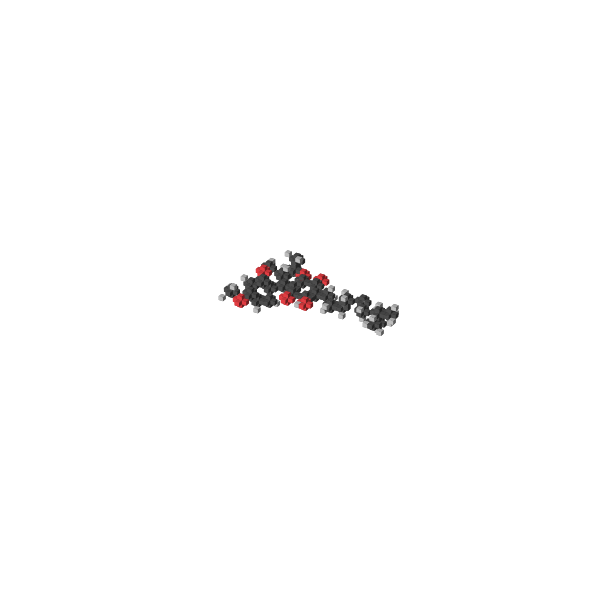

In [49]:
%matplotlib widget
rsubset_Merged_dataset.compounds[999].vis_embedding(channel_idx = 0, conf_id = 0, style = 'mass')